In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
airbnb = pd.read_csv('NYC AirBnB data')

In [23]:
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 4 plots with one categorcal variable

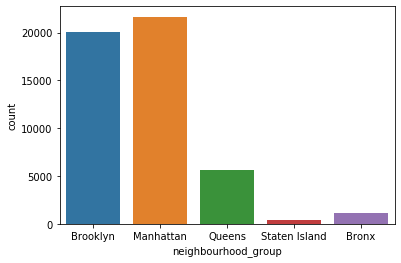

In [4]:
sns.countplot(airbnb['neighbourhood_group'])
plt.show()

## Bar chart
- pros - clean and easy to read
- cons - can not show range of values like a box plot

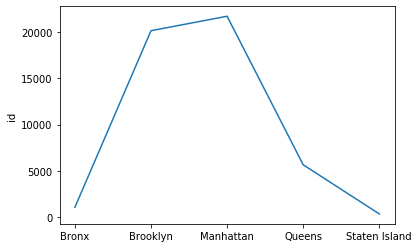

In [5]:
x=airbnb.groupby('neighbourhood_group').count().index.values
y=airbnb.groupby('neighbourhood_group').count()['id']
sns.lineplot(x=x, y=y)
plt.show()

## Line chart

Cons - Bar chart is easier to read

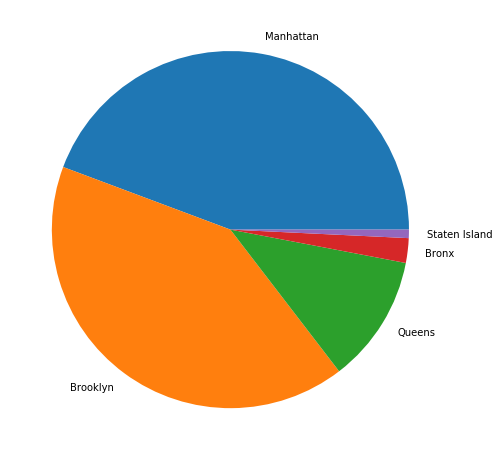

In [6]:
plt.figure(figsize=(8,10))
plt.pie(airbnb['neighbourhood_group'].value_counts(), labels=airbnb['neighbourhood_group'].value_counts().index.values)
plt.show()

## pie chart

- pros - none
- cons - bar chart is much better

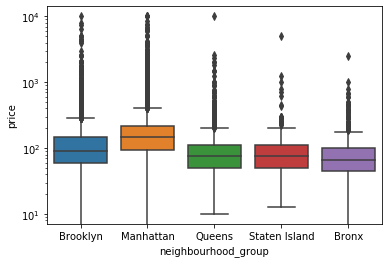

In [7]:
sns.boxplot(x=airbnb['neighbourhood_group'], y=airbnb['price'])
plt.yscale('log')
plt.show()

## Box plot

- pros - can show a range of values for every category

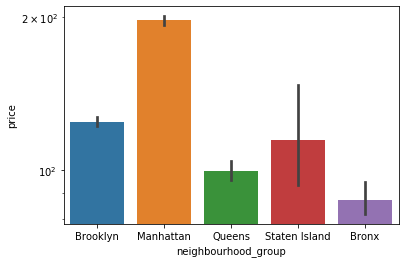

In [8]:
sns.barplot(x=airbnb['neighbourhood_group'], y=airbnb['price'])
plt.yscale('log')
plt.show()

## bar plot
- pros - gives confidence intevals
- cons - does give inter quartile range like boxplot

# 3 plots with two continuous variables

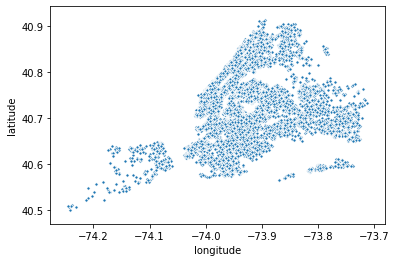

In [25]:
sns.scatterplot(x=airbnb['longitude'], y=airbnb['latitude'], s=10)
plt.show()

## scatter plot
- pros - easily visualizes two continuous variables

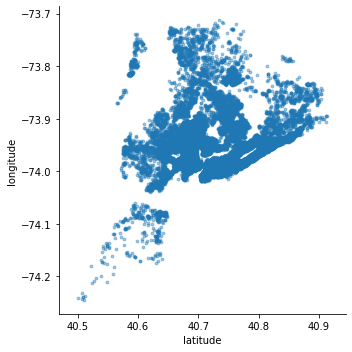

In [27]:
sns.lmplot(y='longitude', x='latitude', data=airbnb, fit_reg=False, scatter_kws={'alpha':0.4, 's':8})
plt.show()

## lmplot

- pros - displays best fit line, displays density of points

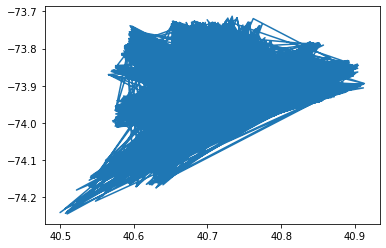

In [29]:
plt.plot(airbnb['latitude'], airbnb['longitude'])
plt.show()

## Line plot
- cons - impossible to read for some continuous variables

# 6 plots with one categorical and one continuous variable

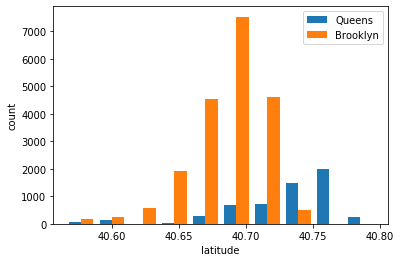

In [50]:
plt.hist([airbnb[airbnb['neighbourhood_group'] == 'Queens']['latitude'], airbnb[airbnb['neighbourhood_group'] == 'Brooklyn']['latitude']], label=['Queens', 'Brooklyn'])
plt.xlabel('latitude')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.show()

## Histogram with categorical hue
- pros - shows distibution of continuous variables within different categories.

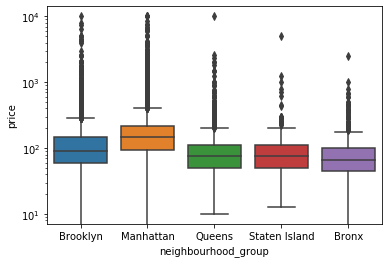

In [15]:
sns.boxplot(x=airbnb['neighbourhood_group'], y=airbnb['price'])
plt.yscale('log')
plt.show()

## box plot
- pros - gives interquartile range of continuous variable among different categories

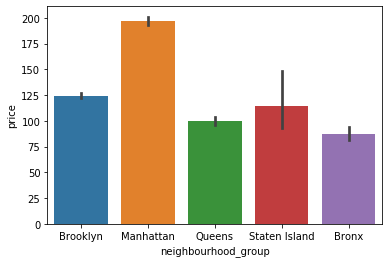

In [16]:
sns.barplot(x=airbnb['neighbourhood_group'], y=airbnb['price'])
plt.show()

## bar plot
- pros - gives confidence interval
- cons - wasted space in plot

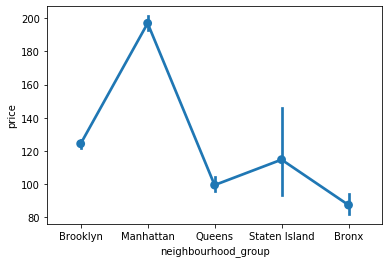

In [17]:
sns.pointplot(x=airbnb['neighbourhood_group'], y=airbnb['price'])
plt.show()

## point plot
- pros - gives confidence interval without wasted space

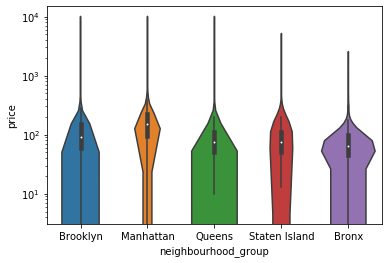

In [18]:
sns.violinplot(x=airbnb['neighbourhood_group'], y=airbnb['price'])
plt.yscale('log')
plt.show()

## violin plot
- pros - shows nuances in distribution that are not possible with box plot.

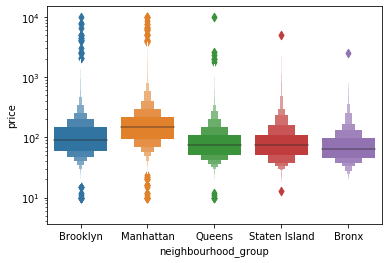

In [19]:
sns.boxenplot(x=airbnb['neighbourhood_group'], y=airbnb['price'])
plt.yscale('log')
plt.show()

## boxen plot
- pros - shows nuances in distribution that are not possible with box plot.

# Master plot

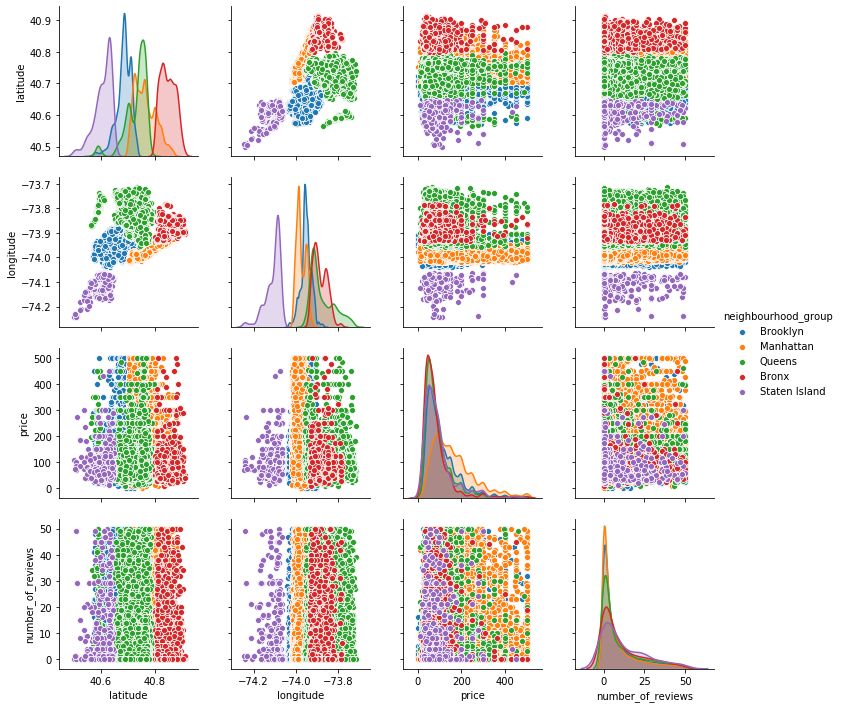

In [55]:
airbnb2 = airbnb[(airbnb['price'] <= 500) & (airbnb['number_of_reviews'] <= 50)]
airbnb2 = airbnb2[['neighbourhood_group', 'latitude', 'longitude', 'price', 'number_of_reviews']]
sns.pairplot(airbnb2, hue='neighbourhood_group')
plt.show()